# Решение задачи "Классификация болезней яблонь" RuCode-3

В этом ноутбуке будем решать задачу классификации болезней яблонь с помощью HOG-признаков изображений

### Скачиваем данные на Google Colab и распаковываем:

In [ ]:
! wget "https://s98vla.storage.yandex.net/rdisk/a185914f68628cd93842d4a6a70dcb0d62a16e7e1106bf3c4cd28e1f12c1795e/606b4686/aZ8Akc9CqtcaAMvg9MkExSJefHHGZZYdTl2AU-VqM4afERxsBLTpt8qwBoFEHzTPyT91bTsmoQx6cwIsgiEZFg==?uid=316082386&filename=train.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=5901567&hid=539d9e8e45b5325472ea6667b22be86c&media_type=compressed&tknv=v2&etag=e20d5f1607aab3615d9c6dab65c2c61c&rtoken=k4PH1F4bj22Z&force_default=yes&ycrid=na-fea6fc7ef38a35b2c39f5ebc2fe4bc33-downloader5h&ts=5bf3ce4da2d80&s=26c22f6add2ee51ad5e848554e5813842dda62c96e5c279c59069a9102b66992&pb=U2FsdGVkX1_yuow0K5VWKBzcLUifWeCtPIK432oYHEqPxtzC1RqtiodajzZXnCdvCMGe7FZ-BPpY4_9z8aqI1QW47a_-pezgoKSHUVTsePA" -O train.zip
! wget "https://s147vla.storage.yandex.net/rdisk/b735f673d07382bc37245810c24d803ec6388172b39cfa2b7d092b18b4a6746d/606b46a8/aZ8Akc9CqtcaAMvg9MkExdtkgBWnfCSxc1Dv7y1NU9c9_o0JWRHuxfnP2i148GqPcl3BUbVgs-Mvl1Yht-sqww==?uid=316082386&filename=test_classes.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=1341245&hid=ac6712119a1a70fa56686892aa7c81df&media_type=compressed&tknv=v2&etag=22a39c0e331780d6f98d164944612e71&rtoken=eXZekDnBFGGd&force_default=yes&ycrid=na-42fa07d4806adce4d5247aabeb3475a3-downloader5h&ts=5bf3ce6e0fa00&s=6d922208f0d9be353f461565faf3c754e27f77ebdff51d22db0aba01d1a01c98&pb=U2FsdGVkX1_8XZNfYSLPzG0xNmB9O-HQpEf66BsuCdvOR0zUYzcpwqGw3bPCrsY0jrepN-0mHN2_0F8t-FcQMR7OvDIH55r2sHwAfe1PKR0" -O test_classes.zip

--2021-04-05 13:20:39--  https://s98vla.storage.yandex.net/rdisk/a185914f68628cd93842d4a6a70dcb0d62a16e7e1106bf3c4cd28e1f12c1795e/606b4686/aZ8Akc9CqtcaAMvg9MkExSJefHHGZZYdTl2AU-VqM4afERxsBLTpt8qwBoFEHzTPyT91bTsmoQx6cwIsgiEZFg==?uid=316082386&filename=train.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=5901567&hid=539d9e8e45b5325472ea6667b22be86c&media_type=compressed&tknv=v2&etag=e20d5f1607aab3615d9c6dab65c2c61c&rtoken=k4PH1F4bj22Z&force_default=yes&ycrid=na-fea6fc7ef38a35b2c39f5ebc2fe4bc33-downloader5h&ts=5bf3ce4da2d80&s=26c22f6add2ee51ad5e848554e5813842dda62c96e5c279c59069a9102b66992&pb=U2FsdGVkX1_yuow0K5VWKBzcLUifWeCtPIK432oYHEqPxtzC1RqtiodajzZXnCdvCMGe7FZ-BPpY4_9z8aqI1QW47a_-pezgoKSHUVTsePA
Resolving s98vla.storage.yandex.net (s98vla.storage.yandex.net)... 93.158.162.227, 2a02:6b8:c0e:182:0:41af:3c42:3478
Connecting to s98vla.storage.yandex.net (s98vla.storage.yandex.net)|93.158.162.227|:443... connected.
HTTP request sent, awaiti

In [ ]:
! unzip train.zip
! unzip test_classes.zip

Archive:  train.zip
   creating: train/
   creating: train/1_ржавчина/
  inflating: train/.DS_Store         
  inflating: __MACOSX/train/._.DS_Store  
   creating: train/2_парша/
   creating: train/0_гниль/
  inflating: train/1_ржавчина/Cedar_rust (90).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_rust (90).JPG  
  inflating: train/1_ржавчина/Cedar_rust (112).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_rust (112).JPG  
  inflating: train/1_ржавчина/Cedar_rust (28).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_rust (28).JPG  
  inflating: train/1_ржавчина/Cedar_rust (86).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_rust (86).JPG  
  inflating: train/1_ржавчина/Cedar_rust (69).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_rust (69).JPG  
  inflating: train/1_ржавчина/Cedar_rust (104).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_rust (104).JPG  
  inflating: train/1_ржавчина/Cedar_rust (12).JPG  
  inflating: __MACOSX/train/1_ржавчина/._Cedar_

In [ ]:
! ls test_classes/

0_гниль  1_ржавчина  2_парша


### Строим решение:

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
images_dir = './train/'
classes = ['0_гниль', '1_ржавчина', '2_парша']
train_images = np.concatenate([os.listdir(os.path.join(images_dir, class_)) for class_ in classes])
train_answers = [0]*len(os.listdir(os.path.join(images_dir, classes[0]))) + \
                [1]*len(os.listdir(os.path.join(images_dir, classes[1]))) + \
                [2]*len(os.listdir(os.path.join(images_dir, classes[2])))

Извлекаем HOG-признаки из каждой картинки тренировочной выборки. Подробнее про HOG можно прочитать тут: https://ru.wikipedia.org/wiki/Гистограмма_направленных_градиентов

In [ ]:
train_hog_features = []
answers = []

hog = cv2.HOGDescriptor()

for i, class_ in enumerate(classes):
    images = os.listdir(os.path.join(images_dir, class_))
    for image in images:
        try:
            img = cv2.imread(os.path.join(os.path.join(images_dir, class_), image))
            # уменьшим немного размер изображения, чтобы длина hog-вектора была поменьше
            img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
            img_hog_feature = hog.compute(img)
            
            train_hog_features.append(img_hog_feature)
            answers.append(i)
        except Exception as e:
            print(image)

.DS_Store
.DS_Store
.DS_Store


In [ ]:
train_hog_features = np.squeeze(np.array(train_hog_features))

In [ ]:
train_hog_features.shape

(390, 680400)

Строим модели логистической регрессии на полученных HOG-признаках картинок. Так как у нас в задаче 3 класса, а логистическая регрессия решает задачу бинарной классификации, разобъем задачу на две:
1. Класс 0 vs классы 1, 2
2. Класс 2 vs классы 0, 1

Первый классификатора будет решать задачу "принадлежит ли картинка классу 0, или другому классу", второй классификатор — задачу "принадлежит ли картинка классу 2, или другому классу".

In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

Заводим массивы ответов для двух классификаторов:

In [ ]:
answers1 = [x if x != 2 else 1 for x in answers]
answers2 = [x if x != 0 else 1 for x in answers]

In [ ]:
logreg1 = LogisticRegression(max_iter=10000)
logreg2 = LogisticRegression(max_iter=10000)

Обучаем классификаторы:

In [ ]:
logreg1.fit(train_hog_features, answers1)
logreg2.fit(train_hog_features, answers2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Получаем ответы на тестовых данных

Загружаем тестовые данные:

In [ ]:
images_dir = './test_classes/'
classes = ['0_гниль', '1_ржавчина', '2_парша']
test_images = np.concatenate([os.listdir(os.path.join(images_dir, class_)) for class_ in classes])
test_answers = [0]*len(os.listdir(os.path.join(images_dir, classes[0]))) + \
                [1]*len(os.listdir(os.path.join(images_dir, classes[1]))) + \
                [2]*len(os.listdir(os.path.join(images_dir, classes[2])))

Получаем HOG-признаки для тестовых картинок (аналогично, как получали для обучающего набора):

In [ ]:
test_hog_features = []
test_answers = []

hog = cv2.HOGDescriptor()

for i, class_ in enumerate(classes):
    images = os.listdir(os.path.join(images_dir, class_))
    for image in images:
        try:
            img = cv2.imread(os.path.join(os.path.join(images_dir, class_), image))
            img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
            img_hog_feature = hog.compute(img)
            test_hog_features.append(img_hog_feature)
            test_answers.append(i)
        except Exception as e:
            print(image)

In [ ]:
test_hog_features = np.squeeze(np.array(test_hog_features))

Получаем ответы двух логрегрессий:

In [ ]:
pred_logreg1 = logreg1.predict_proba(test_hog_features)
pred_logreg2 = logreg2.predict_proba(test_hog_features)

Из предсказаний двух классификаторов собираем общее предсказание: для каждой картинки понимаем, к какому из трех классов мы ее отнесем. 

Если первый классификатор отнес картинку к классу 0, записываем в ответ 0. Если второй классификатор отнес картинку к классу 2, записываем в ответ 2. В остальных случаях ответ — 1.

In [ ]:
pred_all = []
for pred1, pred2 in zip(pred_logreg1, pred_logreg2):
    if pred1[0] > 0.5:
        pred_all.append(0)
    elif pred2[1] > 0.4:
        pred_all.append(2)
    else:
        pred_all.append(1)

(array([32.,  0.,  0.,  0.,  0., 32.,  0.,  0.,  0., 26.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

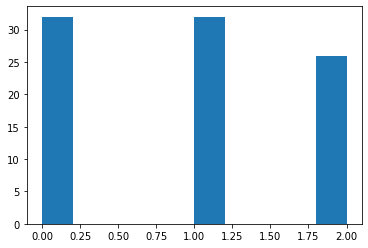

In [ ]:
plt.hist(pred_all)

Считаем метрику accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_answers, pred_all)

0.8222222222222222

Вуаля!